In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold 
from sklearn import preprocessing
from numpy.fft import fft, ifft

# Dynamic Pressure

In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure
0,0.000000,1.161289,-0.084085,49.443383,-0.002651
1,0.000098,1.161289,-0.084085,49.443383,-0.004067
2,0.000195,1.161289,-0.084085,49.443383,-0.003631
3,0.000293,1.161289,-0.084085,49.443383,-0.010969
4,0.000391,1.161289,-0.084085,49.443383,-0.002324
...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307
919996,89.843359,0.593152,-0.090887,49.371344,0.026480
919997,89.843457,0.593152,-0.090887,49.371344,0.018162
919998,89.843555,0.593152,-0.090887,49.371344,0.021976


In [3]:
Time_Norm= Normal_DP['Time ']
Time_Norm

0          0.000000
1          0.000098
2          0.000195
3          0.000293
4          0.000391
            ...    
919995    89.843262
919996    89.843359
919997    89.843457
919998    89.843555
919999    89.843652
Name: Time , Length: 920000, dtype: float64

In [4]:
Normal_DP=Normal_DP.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure
0,1.161289,-0.084085,49.443383,-0.002651
1,1.161289,-0.084085,49.443383,-0.004067
2,1.161289,-0.084085,49.443383,-0.003631
3,1.161289,-0.084085,49.443383,-0.010969
4,1.161289,-0.084085,49.443383,-0.002324
...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307
919996,0.593152,-0.090887,49.371344,0.026480
919997,0.593152,-0.090887,49.371344,0.018162
919998,0.593152,-0.090887,49.371344,0.021976


In [5]:
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [6]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure
0,0.000000,0.165204,-0.616328,27.839285,0.024410
1,0.000098,0.371800,-0.616328,27.839285,0.018997
2,0.000195,0.371800,-0.616328,27.839285,0.016745
3,0.000293,0.371800,-0.616328,27.839285,0.022920
4,0.000391,0.371800,-0.616328,27.839285,0.010825
...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344


In [7]:
Time_cav= Cavitation_DP['Time ']
Time_cav

0            0.000000
1            0.000098
2            0.000195
3            0.000293
4            0.000391
              ...    
1048571    102.399512
1048572    102.399609
1048573    102.399707
1048574    102.399805
1048575    102.399902
Name: Time , Length: 1048576, dtype: float64

In [8]:
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure
0,0.165204,-0.616328,27.839285,0.024410
1,0.371800,-0.616328,27.839285,0.018997
2,0.371800,-0.616328,27.839285,0.016745
3,0.371800,-0.616328,27.839285,0.022920
4,0.371800,-0.616328,27.839285,0.010825
...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324
1048572,0.215623,-0.624159,27.789128,0.009372
1048573,0.215623,-0.624159,27.789128,0.013077
1048574,0.215623,-0.624159,27.789128,0.018344


In [9]:
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [10]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [11]:
df=Normal_DP
Cavdf=Cavitation_DP


In [12]:
df = pd.DataFrame(df, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure'])
Cavdf = pd.DataFrame(Cavdf, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure'])


In [13]:
pca = PCA(n_components =1)
pca.fit(Cavdf)
Cavdf = pca.transform(Cavdf)
Cavdf

array([[-0.40335386],
       [-1.10334914],
       [-1.08180167],
       ...,
       [ 0.12411918],
       [ 0.07372374],
       [ 0.16199948]])

In [14]:
Cavdf.shape

(1048576, 1)

In [15]:
Cavdf = pd.DataFrame(Cavdf)
Cavdf

,0
0,-0.403354
1,-1.103349
2,-1.081802
3,-1.140885
4,-1.025158
...,...
1048571,0.064347
1048572,0.159569
1048573,0.124119
1048574,0.073724


In [16]:
pca.fit(df)
df = pca.transform(df)
df

array([[4.11893844],
       [4.10290175],
       [4.1078396 ],
       ...,
       [1.86483466],
       [1.90802952],
       [1.95245885]])

In [17]:
df = pd.DataFrame(df)
df

,0
0,4.118938
1,4.102902
2,4.107840
3,4.024734
4,4.122642
...,...
919995,1.866477
919996,1.959039
919997,1.864835
919998,1.908030


In [18]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

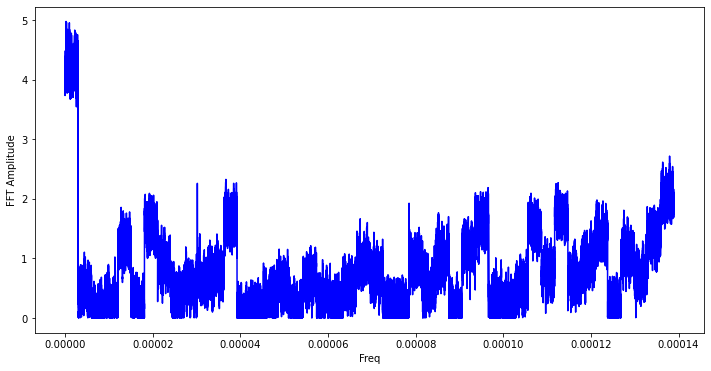

In [19]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [20]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

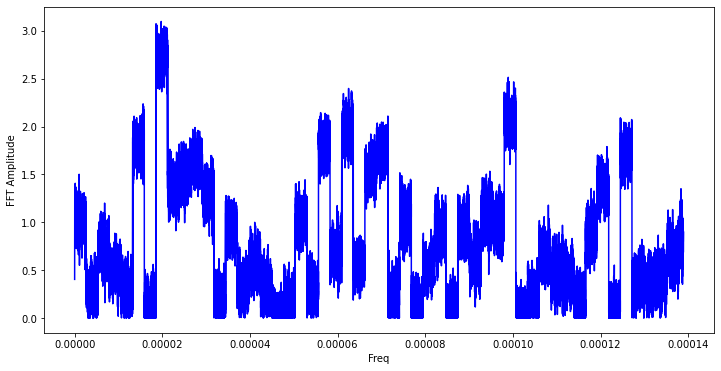

In [21]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_cav[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [22]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [23]:
X_Norm[0]

array([4.1189384], dtype=float32)

In [24]:
X_train, X_test=train_test_split(X_Norm, test_size=0.3, random_state=1)


In [25]:
k = 5
kf = KFold(n_splits=k, random_state=1,shuffle=True)
X = X_Norm
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    ss=preprocessing.StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.fit_transform(X_test)


In [26]:
IF_DP = IsolationForest(random_state=1,contamination=0.03)
IF_DP.fit(X_train)

IsolationForest(contamination=0.03, random_state=1)

In [27]:
prediction= IF_DP.predict(X_test)
score =0
for f in range (0,X_test.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_test.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 96.99%


In [28]:
X_cav

array([[-0.40335387],
       [-1.1033491 ],
       [-1.0818017 ],
       ...,
       [ 0.12411918],
       [ 0.07372374],
       [ 0.16199948]], dtype=float32)

In [29]:
prediction= IF_DP.predict(X_cav)
score =0
for f in range (0,X_cav.shape[0]): 
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_cav.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 96.98%


In [30]:
df_test=X_cav
df_test=pd.DataFrame(df_test)
df_test

,0
0,-0.403354
1,-1.103349
2,-1.081802
3,-1.140885
4,-1.025158
...,...
1048571,0.064347
1048572,0.159569
1048573,0.124119
1048574,0.073724


In [31]:
prediction= IF_DP.predict(df_test)
score=IF_DP.score_samples(df_test)
prediction = [1 if i==-1 else 0 for i in prediction]
df_test['y_test'] = score
df_test['one_class_svm_prediction'] = prediction

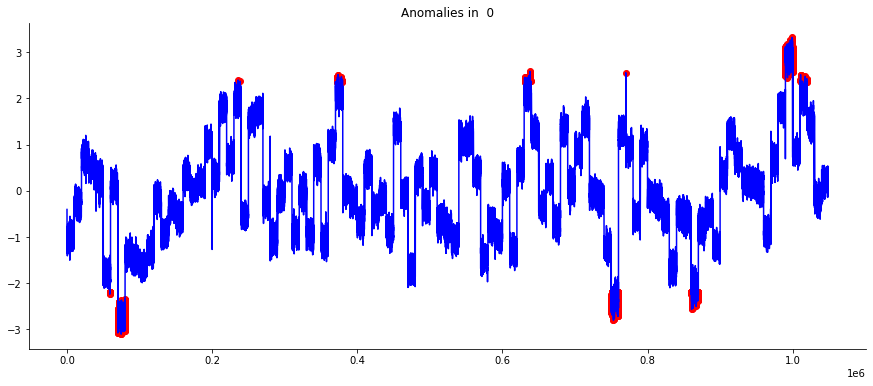

In [32]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['one_class_svm_prediction'] == 1, [0]] #anomaly

ax.plot(df_test.index, df_test[0], color='blue')
ax.scatter(a.index, a[0], color='red')
sb.despine()
plt.title("Anomalies in  0")

plt.show()

# Vibration

In [33]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577


In [34]:
Time_Norm= Normal_Vib['Time ']
Time_Norm

0          0.000000
1          0.000098
2          0.000195
3          0.000293
4          0.000391
            ...    
919995    89.843262
919996    89.843359
919997    89.843457
919998    89.843555
919999    89.843652
Name: Time , Length: 920000, dtype: float64

In [35]:
Normal_Vib=Normal_Vib.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2
0,1.161289,-0.084085,49.443383,0.897711,0.374315
1,1.161289,-0.084085,49.443383,-0.612374,1.983866
2,1.161289,-0.084085,49.443383,-0.699269,2.101856
3,1.161289,-0.084085,49.443383,1.121377,1.053456
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224
919996,0.593152,-0.090887,49.371344,1.000499,1.311315
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577


In [36]:
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [37]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815


In [38]:
Time_cav= Cavitation_Vib['Time ']
Time_cav

0            0.000000
1            0.000098
2            0.000195
3            0.000293
4            0.000391
              ...    
1048571    102.399512
1048572    102.399609
1048573    102.399707
1048574    102.399805
1048575    102.399902
Name: Time , Length: 1048576, dtype: float64

In [39]:
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2
0,0.165204,-0.616328,27.839285,0.283178,-0.124765
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264
2,0.371800,-0.616328,27.839285,0.331279,0.257127
3,0.371800,-0.616328,27.839285,0.509145,-0.061347
4,0.371800,-0.616328,27.839285,0.419741,-1.516285
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815


In [40]:
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [41]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [42]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [43]:
df = pd.DataFrame(df, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2'])


In [44]:
pca = PCA(n_components =1)
pca.fit(Cavdf)
Cavdf = pca.transform(Cavdf)
Cavdf

array([[-0.28449937],
       [-1.02123779],
       [-1.04664739],
       ...,
       [ 0.16538217],
       [ 0.23279352],
       [ 0.20199685]])

In [45]:
Cavdf.shape

(1048576, 1)

In [46]:
Cavdf = pd.DataFrame(Cavdf)
Cavdf

,0
0,-0.284499
1,-1.021238
2,-1.046647
3,-1.069470
4,-1.084844
...,...
1048571,0.209457
1048572,0.184337
1048573,0.165382
1048574,0.232794


In [47]:
pca.fit(df)
df = pca.transform(df)
df

array([[4.33434767],
       [4.35681155],
       [4.3579776 ],
       ...,
       [1.77420205],
       [1.7777569 ],
       [1.72643519]])

In [48]:
df = pd.DataFrame(df)
df

,0
0,4.334348
1,4.356812
2,4.357978
3,4.326443
4,4.381620
...,...
919995,1.815291
919996,1.741833
919997,1.774202
919998,1.777757


In [49]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

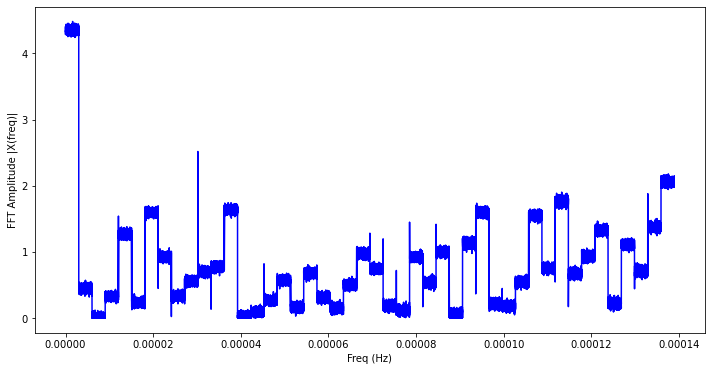

In [50]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [51]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

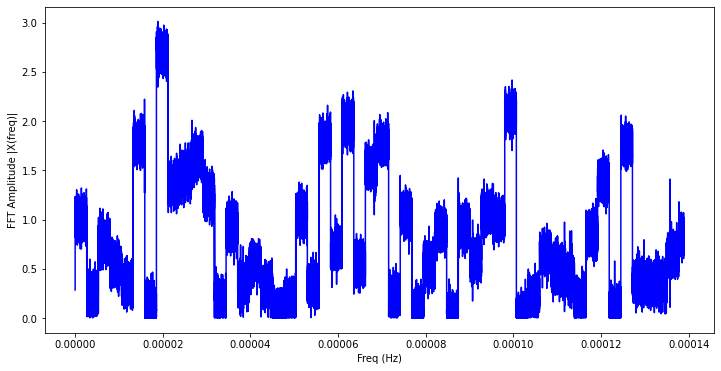

In [52]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_cav[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [53]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [54]:
X_train, X_test=train_test_split(X_Norm, test_size=0.3, random_state=1)


In [55]:
k = 5
kf = KFold(n_splits=k, random_state=1,shuffle=True)
X = X_Norm
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    ss=preprocessing.StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.fit_transform(X_test)


In [56]:
IF_Vib = IsolationForest(random_state=1,contamination=0.03)
IF_Vib.fit(X_train)

IsolationForest(contamination=0.03, random_state=1)

In [57]:
prediction= IF_Vib.predict(X_test)
score =0
for f in range (0,X_test.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_test.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 96.98%


In [58]:
X_cav

array([[-0.28449938],
       [-1.0212377 ],
       [-1.0466474 ],
       ...,
       [ 0.16538218],
       [ 0.23279352],
       [ 0.20199685]], dtype=float32)

In [59]:
prediction= IF_Vib.predict(X_cav)
score =0
for f in range (0,X_cav.shape[0]): 
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_cav.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 94.42%


In [60]:
df_test=X_cav
df_test=pd.DataFrame(df_test)
df_test

,0
0,-0.284499
1,-1.021238
2,-1.046647
3,-1.069470
4,-1.084844
...,...
1048571,0.209457
1048572,0.184337
1048573,0.165382
1048574,0.232794


In [61]:
prediction= IF_Vib.predict(df_test)
score=IF_Vib.score_samples(df_test)
prediction = [1 if i==-1 else 0 for i in prediction]
df_test['y_test'] = score
df_test['one_class_svm_prediction'] = prediction

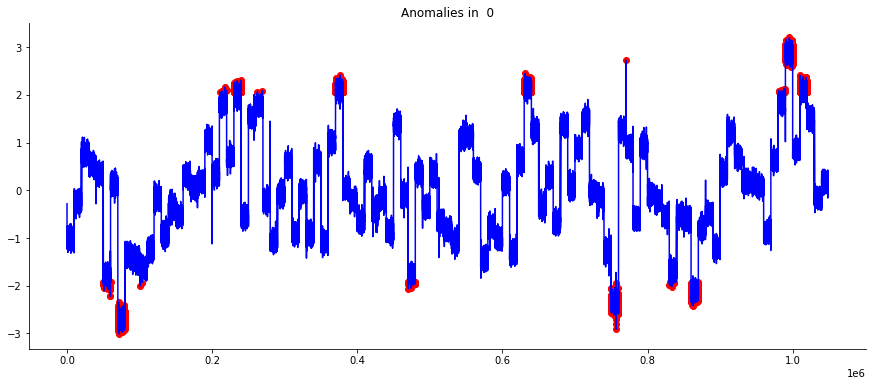

In [62]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['one_class_svm_prediction'] == 1, [0]] #anomaly

ax.plot(df_test.index, df_test[0], color='blue')
ax.scatter(a.index, a[0], color='red')
sb.despine()
plt.title("Anomalies in  0")

plt.show()